<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF2_0_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [96]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,  GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [97]:
#Yes, you can read dataframes from URLs
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [98]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [99]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [135]:
# start by doing the WRONG thing - trying to predict the price itself
series = df['close'].values.reshape(-1,1) #only 1 column

In [138]:
print(series.shape)

(1259, 1)


In [101]:
#Normaize the data 
#NOte: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler() # z = (x - u) / s // if with_mean = False => u(mean) = 0  // if with_std = False => s(std desv) = 1 // x is the sample 
scaler.fit(series[:len(series)//2]) #usamos el fit function solo en la primera mitad de la serie. Esto es porque no queremos incluir el test data in el training pipeline //normaliza la primera mitad de los datos
series = scaler.transform(series).flatten() #copy a given array an collapsed into one dimmension

In [102]:
### build the dataset []
T = 10
D = 1
X = []
Y = []
for t in range(len(series)- T): #lo que mida la serie -10
  x = series[t:t+T] # cuando t = 1, entonces corre de 1 a 11, cuando es 2 , corre de 2 a 12 ya si (en la primera iteración irá de 0 a 9 porque T =10)
  X.append(x)  #Se anexa el x al final 
  y = series[t+T]  #si t  = 3 entonces es 13. i.e. se busca la observación 13 estando en el 3.
  Y.append(y) #Se anexa el y al final

X = np.array(X).reshape(-1, T, 1) #NOw the data should be N x T x D #Una vez que tienes un array, ahora transpones los arrays de tal forma que tenga T(osea 10) cada una, los -1 sirven si no sabes cuando hay en algo pero la pc los acomoda automaticamente
Y = np.array(Y) #Se crea un array con los valore Y
N = len(X) #el número de items en X
print("X.shape", X.shape, "Y.shape", Y.shape)

# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

X.shape (1249, 10, 1) Y.shape (1249,)


In [127]:
#try autoregressive RNN model []
i = Input(shape=(T,1)) #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = LSTM(5)(i) #simpleRNN(5,activation='relu')(i) # el por defecto es un tanh
x = Dense(1)(x) #final layer is one #solo es una capa. #aquí iba 1 originalmente 
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2], # si fuera _1 , signfica que la borra la última observacion,entonces -N borra todo pero //2 significa que toma última mitad de los datos
  epochs = 80,
  validation_data=(X[-N//2:], Y[-N//2:]), #valida con los mismos datos
)

# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)

Epoch 1/80
20/20 [==============================] - 3s 36ms/step - loss: 1.0154 - val_loss: 1.2393
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 1.0006 - val_loss: 1.1423
Epoch 3/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9807 - val_loss: 1.2665
Epoch 4/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9807 - val_loss: 1.1398
Epoch 5/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9988 - val_loss: 1.1505
Epoch 6/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9837 - val_loss: 1.1631
Epoch 7/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9907 - val_loss: 1.2620
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9880 - val_loss: 1.1962
Epoch 9/80
20/20 [==============================] - 0s 10ms/step - loss: 1.0065 - val_loss: 1.1492
Epoch 10/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9820 - val_loss: 1.1596
Epoch 11/8

39/39 [==============================] - 1s 3ms/step
(1248, 1)


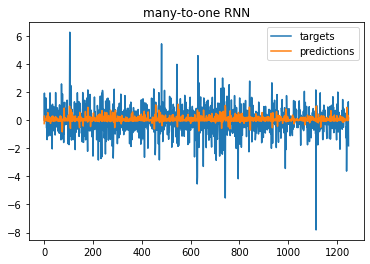

In [128]:
#One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


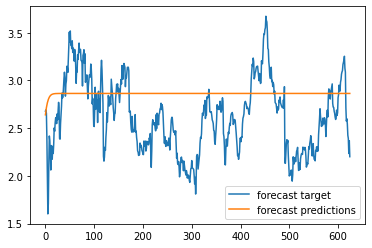

In [105]:
#Mutli-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1 - D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label ='forecast predictions')
plt.legend()

In [106]:
# calculate returns by first shifting the data
df ['PrevClose'] = df['close'].shift(1) # move everything up 1

#so now it's like
#close / prev close
# x[2] x [1]
# X[3] x [ 2]
#...
# x[t] x[t-1]

In [107]:
df.head() #Tomamos 10 para predecir el 11

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [108]:
# Then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [109]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


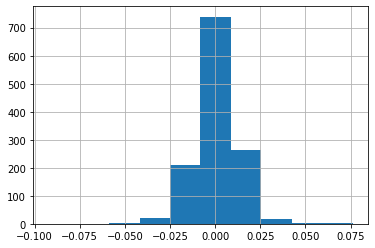

In [110]:
# NOw let's try an LSTM to predict returns
df['Return'].hist()

In [111]:
series = df['Return'].values[1:].reshape(-1,1)

#Normaize the data 
#NOte: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler() # z = (x - u) / s // if with_mean = False => u(mean) = 0  // if with_std = False => s(std desv) = 1 // x is the sample 
scaler.fit(series[:len(series) // 2]) #usamos el fit function solo en la primera mitad de la serie. Esto es porque no queremos incluir el test data in el training pipeline //normaliza la primera mitad de los datos
series = scaler.transform(series).flatten() #copy a given array an collapsed into one dimmension

In [112]:
### build the dataset 
# let's see if we can use t past values to predict the next value

T = 10
D = 1
X = []
Y = []
for t in range(len(series)- T): #lo que mida la serie -10
  x = series[t:t+T] # cuando t = 1, entonces corre de 1 a 11, cuando es 2 , corre de 2 a 12 ya si (en la primera iteración irá de 0 a 9 porque T =10)
  X.append(x)  #Se anexa el x al final 
  y = series[t+T]  #si t  = 3 entonces es 13. i.e. se busca la observación 13 estando en el 3.
  Y.append(y) #Se anexa el y al final

X = np.array(X).reshape(-1, T, 1) #NOw the data should be N x T x D #Una vez que tienes un array, ahora transpones los arrays de tal forma que tenga T(osea 10) cada una, los -1 sirven si no sabes cuando hay en algo pero la pc los acomoda automaticamente
Y = np.array(Y) #Se crea un array con los valore Y
N = len(X) #el número de items en X
print("X.shape", X.shape, "Y.shape", Y.shape)

# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

X.shape (1248, 10, 1) Y.shape (1248,)


In [113]:
#try autoregressive RNN model []
i = Input(shape=(T,1)) #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = LSTM(5)(i) #simpleRNN(5,activation='relu')(i) # el por defecto es un tanh
x = Dense(1)(x) #final layer is one #solo es una capa. 
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2], # si fuera _1 , signfica que la borra la última observacion,entonces -N borra todo pero //2 significa que toma última mitad de los datos
  epochs = 80,
  validation_data=(X[-N//2:], Y[-N//2:]), #valida con los mismos datos
)

# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)

Epoch 1/80
20/20 [==============================] - 3s 39ms/step - loss: 1.0013 - val_loss: 1.1515
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9911 - val_loss: 1.1351
Epoch 3/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9934 - val_loss: 1.1838
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9931 - val_loss: 1.1458
Epoch 5/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9853 - val_loss: 1.1682
Epoch 6/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9912 - val_loss: 1.1461
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 1.0035 - val_loss: 1.1286
Epoch 8/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9965 - val_loss: 1.1312
Epoch 9/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9887 - val_loss: 1.1582
Epoch 10/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9835 - val_loss: 1.2523
Epoch 11/80

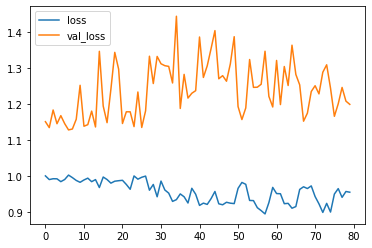

In [114]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

39/39 [==============================] - 1s 6ms/step
(1248, 1)


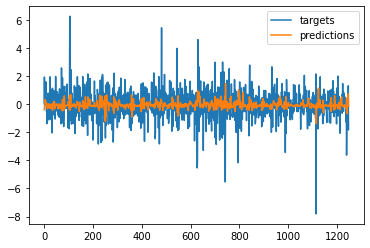

In [115]:
#One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


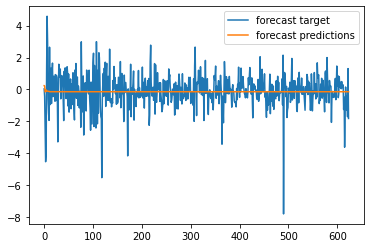

In [116]:
#Mutli-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1 - D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label ='forecast predictions')
plt.legend()

In [117]:
#Now turn the full data into numpy arrays

# Not yet in the final "X" format!
input_data = df[['open', 'high','low','close','volume']].values
targets = df['Return'].values


In [118]:
# Now make the actual data which will go into the neural network
T = 10 #the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1] #en este ejemplo son 5 porque usamos 5 variables disitntas
N = len(input_data) - T # (e.g. if T = 10 and you have 11 data points then you'd onlye have 1 sample )

In [119]:
# normalize the inputs
Ntrain = len(input_data) * 2 //3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T]) #escala los primeros 2/3 de datos + T
input_data = scaler.transform(input_data) # remplaza el dataset a los datos escalados

In [120]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249,5,10)
Y_train = np.zeros(Ntrain)

for t in range(Ntrain): 
  X_train[t, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables
  Y_train[t] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [121]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249-2/3 Ntrain ,5,10)
Y_test = np.zeros(N - Ntrain) # (1249-839)

#Acá llenamos los ceros generados
for u in range(N - Ntrain): 
  # u ocunts from 0... (N - Ntrain)
  # t counts form Ntrain...N 
  t = u + Ntrain #(U toma de 0 hasta N, Ntrain siempre es 839)
  X_test[u, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables
  Y_test[u] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [122]:
# Make the RNN []
i = Input(shape=(T,D))  #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = LSTM(5)(i) #50 = number of hidden units // #i = (10,5)(especificación de la entrada)
x = Dense(1, activation='sigmoid')(x)  # final layer is one #solo es una capa. 
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate= 0.001),
    metrics = ['accuracy'],
)


In [123]:
# train the RNN
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 3s 30ms/step - loss: 0.7072 - accuracy: 0.4708 - val_loss: 0.7019 - val_accuracy: 0.5024
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.4803 - val_loss: 0.6974 - val_accuracy: 0.4854
Epoch 3/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6983 - accuracy: 0.4815 - val_loss: 0.6959 - val_accuracy: 0.4927
Epoch 4/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6969 - accuracy: 0.4899 - val_loss: 0.6958 - val_accuracy: 0.4829
Epoch 5/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6958 - accuracy: 0.5006 - val_loss: 0.6949 - val_accuracy: 0.4902
Epoch 6/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.4994 - val_loss: 0.6945 - val_accuracy: 0.4902
Epoch 7/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6945 - accuracy: 0.5077 - val_loss: 0.6942 - val_accuracy: 0.4927
Epoch 8/

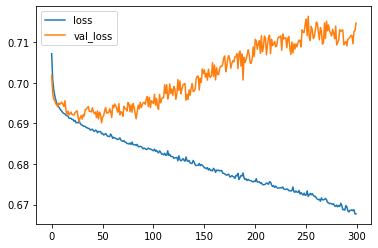

In [124]:
#Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

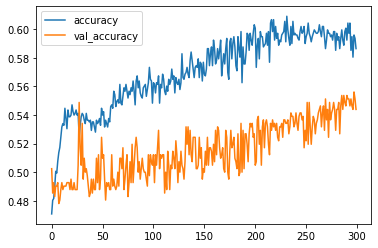

In [125]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [130]:
#Mutli-step forecast
forecast = []
input_ = X[-N//2] #como no tiene los ":" entonces significa que toma la primera mitad de los datos
while len(forecast) < len(Y[-N//2:]):
  #Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  #make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

1/1 [==============================] - 0s 22ms/step


In [142]:
#forecast = scaler.inverse_transform(forecast)
train_results = pd.DataFrame(data={'Train Predictions':forecast})
train_results

,Train Predictions
0,-0.055144
1,0.036534
2,0.011494
3,0.065635
4,-0.015364
...,...
620,0.004791
621,0.004791
622,0.004791
623,0.004791


In [131]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10, 1)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 5)                 140       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
